In [25]:
%matplotlib widget

# To prevent automatic figure display when execution of the cell ends
# %config InlineBackend.close_figures=False 

import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass

from ipywidgets import widgets

from IPython.display import display,clear_output

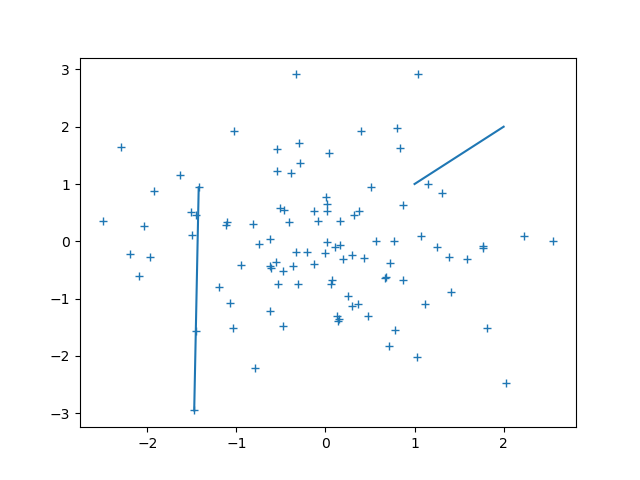

In [26]:
# plt.ioff()
fig, ax = plt.subplots()

# out=widgets.Output()
button=widgets.Button(description='Next')
text1=widgets.Text(description="x1,y1", value="1,1")
text2=widgets.Text(description="x2,y2", value="2,2")
vbox=widgets.VBox([
    widgets.HBox([
        button,
        text1,
        text2,
    ]),
])
display(vbox)

def get_xy(string_point):
    x,y = string_point.split(',')
    return int(x), int(y)

def click(b):
    ax.clear()
    x = np.random.randn(100)
    y = np.random.randn(100)
    ax.plot(x,y,'+')
    x1,y1 = get_xy(text1.value)
    x2,y2 = get_xy(text2.value)
    line1 = plt.Line2D(x[[x1, x2]], y[[y1, y2]], lw=1.5)
    ax.add_line(line1)
    line2 = plt.Line2D((x1,x2), (y1,y2), lw=1.5)
    ax.add_line(line2)
    fig.canvas.draw()
    # with out:
    #     clear_output(wait=True)
        # display(fig)

button.on_click(click)
click(None)

In [ ]:

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')


In [103]:
class Point():
    def __init__(self, x, y):
        self.widget = widgets.Text(description="x,y", value=f"{x},{y}")
    
    def xy(self):
        x,y = self.widget.value.split(',')
        return float(x),float(y)

In [109]:
class LinearFace:
    def __init__(self, x1=0, x2=1, y1=0, y2=1, length=10, width=2):
        self.p1 = Point(x1,y1)
        self.p2 = Point(x2,y2)
        self.length = widgets.Text(description="Length", value=str(length))
        self.width = widgets.Text(description="Width", value=str(width))
        x,y = self._compute_midpoint()
        self.midpoint = widgets.Text(description="line midpoint", value=f"{x},{y}")
        self.c1 = 
        
        self.inputs = [widgets.Label("Inputs"), self.p1.widget, self.p2.widget, self.length, self.width]
        self.derived = [widgets.Label("Derived"), self.midpoint]
        self.layout = widgets.HBox([
            widgets.VBox(self.inputs),
            widgets.VBox(self.derived),
        ])
        
        # wire up interactivity
        wire_to_midpoint = [self.p1, self.p2]
        for widg in wire_to_midpoint:
            widg.widget.observe(self._update_midpoint, names='value')
                                     
        
    def _compute_midpoint(self):
        x1,y1 = self.p1.xy()
        x2,y2 = self.p2.xy()
        x_mid = (x1 + x2) / 2
        y_mid = (y1 + y2) / 2
        return x_mid, y_mid
    
    def _update_midpoint(self,change):
        x,y = self._compute_midpoint()
        self.midpoint.value = f'{x},{y}'
        
    def _update_rectangle(self, change):
        x,y = self._compute_midpoint()
        width = float(self.width.value)
        length = float(self.length.value)
        p1 = 
        


In [ ]:
def distance_along_line(p1, p2, units):
    """Move `units` from `p1` to `p2`"""
    

In [110]:
lf = LinearFace()

In [111]:
lf.layout

In [42]:
l.midpoint()

(0.0, 0.0)

In [ ]:
class Shapes:
    def __init__(self):
        pass
    

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

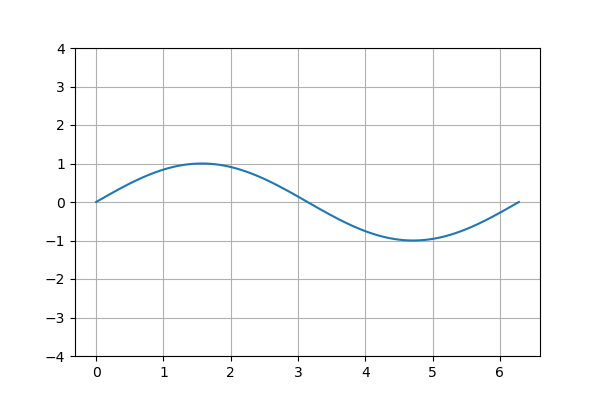

In [2]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')